<a href="https://colab.research.google.com/github/TehilaC/Expert-Ranking-Algorithm-in-Online-Communities/blob/main/StackOverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=07a9bf924995845bb459db4c483b7a5a9e531f1031623d17ae5d2f4b1020b1a7
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [2]:
import networkx as nx
from node2vec import Node2Vec
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from networkx import Graph

from urllib.request import urlopen
from bs4 import BeautifulSoup

import codecs

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/לימודים MBA/שנה ב/סמינריון/DATA/stackoverflow/A/answers.csv"
answers = pd.read_csv(path) 

In [5]:
path = "/content/drive/MyDrive/לימודים MBA/שנה ב/סמינריון/DATA/stackoverflow/A/questions.csv"
questions = pd.read_csv(path) 


In [6]:
answers['owner_user_id'] = answers['owner_user_id'].astype(float)
answers['id'] = answers['id'].astype(float)
answers = answers.drop('Unnamed: 0', axis=1)
answers = answers.drop_duplicates()
answers = answers[answers['id'].notna()]
answers.head()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,69079159.0,NaN,<p>There's no advantage to recording only loca...,NaN,NaN,0,NaN,2021-09-06 18:54:10.037 UTC,NaN,2021-09-06 18:54:10.037 UTC,NaN,NaN,NaN,NaN,4562911.0,69077662,2,1,NaN,NaN
1,69266637.0,NaN,<p>By doing <code>df[&quot;EMP ID&quot;]==id_n...,NaN,NaN,1,NaN,2021-09-21 09:36:54.013 UTC,NaN,2021-09-21 09:36:54.013 UTC,NaN,NaN,NaN,NaN,7093741.0,69266567,2,0,NaN,NaN
2,69266669.0,NaN,<pre><code>df.loc[df['EMP ID']==id_no]['Name E...,NaN,NaN,3,NaN,2021-09-21 09:38:59.217 UTC,NaN,2021-09-21 09:38:59.217 UTC,NaN,NaN,NaN,NaN,6914888.0,69266567,2,0,NaN,NaN
3,69153698.0,NaN,"<p>Finally, I decided to use pandas_udf and py...",NaN,NaN,0,NaN,2021-09-12 17:17:10.473 UTC,NaN,2021-09-12 17:17:10.473 UTC,NaN,NaN,NaN,NaN,8968392.0,69146380,2,1,NaN,NaN
4,69146800.0,NaN,<p>You can convert arabic number to english by...,NaN,NaN,0,NaN,2021-09-11 21:21:46.83 UTC,NaN,2021-09-11 21:21:46.83 UTC,NaN,NaN,NaN,NaN,8773309.0,69146380,2,5,NaN,NaN


In [7]:
questions['owner_user_id'] = questions['owner_user_id'].astype(float)
questions['id'] = questions['id'].astype(float)
questions = questions.drop('Unnamed: 0', axis=1)
questions = questions.drop_duplicates()
questions = questions[questions['id'].notna()]
questions.head()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,70367469.0,How to rasterize a batch of polygons in python,<p>I have a batch of polygons which could be a...,70368518,2,0,NaN,2021-12-15 16:55:34.75 UTC,NaN,2022-03-04 04:25:36.127 UTC,2021-12-15 20:47:25.147 UTC,NaN,16287416.0,NaN,16287416.0,NaN,1,0,python|numpy|geometry|polygon|rasterizing,257
1,70382878.0,Add role when react to emoji discord.py,<p>im trying to add a role when the user react...,70384661,3,0,NaN,2021-12-16 17:00:26.813 UTC,NaN,2021-12-16 22:42:24.52 UTC,NaN,NaN,NaN,NaN,17694834.0,NaN,1,1,python|discord.py|roles|emoji,257
2,70422866.0,how to create a venv with a different python v...,<p>I have different venvs in my machine in whi...,70422970,4,0,NaN,2021-12-20 13:52:38.48 UTC,1.0,2022-01-03 17:25:25.22 UTC,NaN,NaN,NaN,NaN,16594286.0,NaN,1,2,python-3.x|python-venv,2050
3,70518826.0,ONNX runtime bert inference: RuntimeError: Inp...,<p>I am trying to use Huggingface Bert model u...,70565379,1,0,NaN,2021-12-29 11:32:07.467 UTC,NaN,2022-01-03 11:51:43.82 UTC,NaN,NaN,NaN,NaN,8243797.0,NaN,1,0,python|deep-learning|huggingface-transformers|...,259
4,70356867.0,SolverProblemError on install Tensorlfow with ...,<p>when i add tensoflow with poetry (poetry ad...,70367407,2,0,NaN,2021-12-14 23:44:43.92 UTC,NaN,2021-12-16 18:48:21.753 UTC,NaN,NaN,NaN,NaN,11514393.0,NaN,1,1,python|tensorflow|python-poetry,260


In [8]:
df_id = questions['owner_user_id'].append(answers['owner_user_id'])
df_id = df_id.dropna()

answers['parent_id'] = answers['parent_id'].astype(float)
edge_list = pd.merge( answers, questions, how="inner", left_on="parent_id", right_on="id" )

In [9]:
# add weight to accepted answers
#edge_list['weight'] = edge_list["id_x"]==edge_list["accepted_answer_id_y"]
edge_list.loc[edge_list["id_x"]==edge_list["accepted_answer_id_y"], 'weight'] = 2
edge_list.loc[edge_list["id_x"]!=edge_list["accepted_answer_id_y"], 'weight'] = 1
#edge_list['weight'].apply(lambda edge_list["id_x"]: 2 if ==edge_list["accepted_answer_id_y"] else 1)

In [10]:
#questions.loc[questions["accepted_answer_id"].isna()] 
questions.loc[questions["accepted_answer_id"]<=0] 

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count


In [11]:
edge_list['weight']

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
206461    1.0
206462    1.0
206463    2.0
206464    2.0
206465    2.0
Name: weight, Length: 206466, dtype: float64

In [12]:
df_id = questions['owner_user_id'].append(answers['owner_user_id'])
df_id = df_id.dropna()
df_id = df_id.drop_duplicates()

In [13]:
df = edge_list[["owner_user_id_x", "owner_user_id_y", "id_x", "id_y", "weight"]]
df = df.drop_duplicates()
edges = df[["owner_user_id_x", "owner_user_id_y", "weight"]]
edges.columns = ["answer_user_id", "question_user_id", "weight"]
edges = edges.dropna()

In [14]:
ed = edges["answer_user_id"].append(edges["question_user_id"])
id_d = pd.DataFrame(df_id)
ed_d = pd.DataFrame(ed)
ed_d.columns = ["answer_user_id"]
ed_id = pd.merge( ed_d, id_d, how="left", left_on="answer_user_id", right_on="owner_user_id" )
ed_id = ed_id.drop_duplicates()
ed_id

,answer_user_id,owner_user_id
0,4562911.0,4562911.0
1,7093741.0,7093741.0
2,6914888.0,6914888.0
3,8968392.0,8968392.0
4,8773309.0,8773309.0
...,...,...
403188,15904593.0,15904593.0
403192,16134708.0,16134708.0
403193,14549231.0,14549231.0
403199,14796125.0,14796125.0


In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G=nx.DiGraph()

In [16]:
pages = df_id
G.add_nodes_from(pages)

In [17]:
edges_l = edges.values.tolist() #zip(edges["answer_user_id"], edges["question_user_id"])
G.add_weighted_edges_from(edges_l)
#G.add_edges_from(edges_l)


In [18]:
#G.is_directed = False
G.is_directed()

True

In [38]:
print("Nodes of graph: ")
print(G.nodes())
print("Num Edges of graph: ")
print(G.number_of_edges())
print("Num Nodes of graph: ")
print(G.number_of_nodes())
gn = pd.DataFrame(G.nodes())
gn

Nodes of graph: 
[16287416.0, 17694834.0, 16594286.0, 8243797.0, 11514393.0, 16546574.0, 1470034.0, 3931427.0, 17661384.0, 17726362.0, 8647786.0, 17809030.0, 15226448.0, 17695748.0, 14823261.0, 16492629.0, 17766911.0, 15826634.0, 7708272.0, 4505301.0, 17922321.0, 3890904.0, 3826115.0, 12689500.0, 9404668.0, 17738312.0, 17410707.0, 17845255.0, 17867622.0, 9385136.0, 9256750.0, 17163556.0, 16370131.0, 16492659.0, 14667788.0, 16527801.0, 17410353.0, 13998438.0, 2261062.0, 17539514.0, 17648607.0, 2650838.0, 5809758.0, 17881423.0, 10916136.0, 16988971.0, 10046407.0, 496136.0, 17760043.0, 16467154.0, 2897115.0, 6335363.0, 17840900.0, 3053216.0, 16724561.0, 4281999.0, 2395694.0, 3396771.0, 15599509.0, 818131.0, 4619958.0, 14954799.0, 1471980.0, 17490743.0, 12181176.0, 12276279.0, 17304179.0, 16338642.0, 15702103.0, 10001055.0, 6481019.0, 12621803.0, 5486582.0, 17762050.0, 17810660.0, 17250292.0, 17444622.0, 17840541.0, 12918011.0, 7486022.0, 15576973.0, 12909341.0, 283538.0, 1616488.0, 168091

,0
0,16287416.0
1,17694834.0
2,16594286.0
3,8243797.0
4,11514393.0
...,...
106107,538016.0
106108,15737021.0
106109,10497872.0
106110,1242659.0


In [20]:
import networkx as nx
#G=nx.barabasi_albert_graph(60,41)
pr=nx.pagerank(G,0.4)

In [21]:
d=pd.DataFrame(pr, index=[0])
d

,16287416.0,17694834.0,16594286.0,8243797.0,11514393.0,16546574.0,1470034.0,3931427.0,17661384.0,17726362.0,...,5897035.0,15166732.0,9513183.0,8443093.0,14783893.0,538016.0,15737021.0,10497872.0,1242659.0,15757052.0
0,0.000016,0.000011,0.000015,0.000011,0.000011,0.00002,0.00001,0.000008,0.000014,0.000021,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008


In [22]:
nodes_id = pd.DataFrame(df_id)
nodes_id.reset_index(inplace=True, drop=True)
nodes_id['pr'] = nodes_id['owner_user_id'].map(pr)


In [23]:
nodes_id
nodes_id.to_csv('/content/drive/MyDrive/לימודים MBA/שנה ב/סמינריון/DATA/stackoverflow/Page_Rank_with_weight.csv', encoding='utf-8')

In [24]:
nodes_id.head()
nodes_id.sort_values(by=['pr'], ascending=False) #nodes_id['pr'].sort_values(ascending=False)

,owner_user_id,pr
1120,8372455.0,0.000093
23423,13019246.0,0.000091
1253,11462274.0,0.000087
1220,9983652.0,0.000086
2006,5896319.0,0.000085
...,...,...
86909,2891476.0,0.000008
86908,1389644.0,0.000008
86907,7561151.0,0.000008
86906,3026105.0,0.000008


In [25]:
edge_list[edge_list.eq(8372455).any(1)].to_csv('/content/drive/MyDrive/לימודים MBA/שנה ב/סמינריון/DATA/stackoverflow/check_PR.csv', encoding='utf-8')

In [26]:
df_id[df_id.eq(13019246.0)]

32708    13019246.0
Name: owner_user_id, dtype: float64

In [27]:
#edge_list[edge_list.eq(8372455)]



In [28]:
in_degrees = pd.DataFrame([( node , val) for (node, val) in G.in_degree()])
in_degrees.columns = ["node", "in_degrees"]

In [29]:
out_degrees = pd.DataFrame([( node , val) for (node, val) in G.out_degree()])
out_degrees.columns = ["node", "out_degree"]

In [30]:
degrees = pd.DataFrame([( node , val) for (node, val) in G.degree()])
degrees.columns = ["node", "degree"] 

In [31]:
df_degrees = pd.merge( degrees,  out_degrees , how="left")
df_degrees = pd.merge( df_degrees,  in_degrees , how="left")

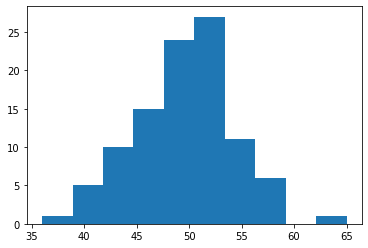

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.out_degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

In [33]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

In [34]:
#G = nx.scale_free_graph(5000)

#in_degree_freq = degree_histogram_directed(G, in_degree=True)
#out_degree_freq = degree_histogram_directed(G, out_degree=True)
#degrees = range(len(in_degree_freq))
#plt.figure(figsize=(12, 8)) 
#plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
#plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
#plt.xlabel('Degree')
#plt.ylabel('Frequency')

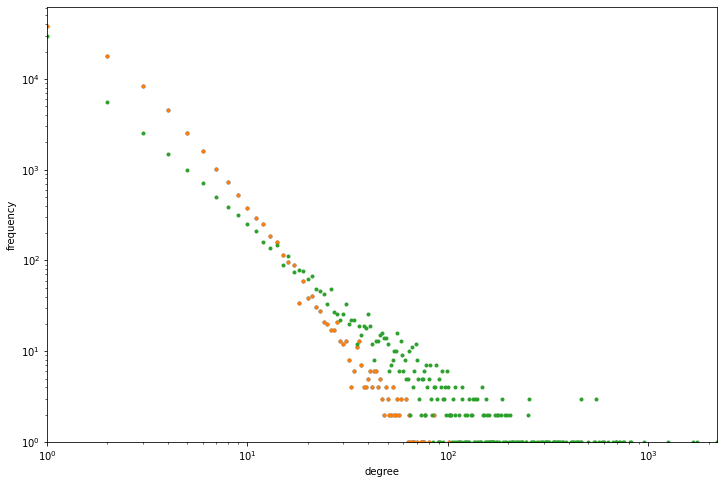

In [35]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

in_degree_counts = Counter(in_degrees["in_degrees"])                                                                                                 
i_x, i_y = zip(*in_degree_counts.items())                                                      
                                                                                                
plt.figure(figsize=(12, 8)) 
                                                                                                                                                                                                                                                      
# prep axes                                                                                                                      
plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(i_x) )  
                                                                                                           
plt.ylabel('frequency')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(i_y))                                                                                                             
                                                                                                                                     # do plot                                                                                                                        
plt.scatter(i_x, i_y, marker='.')   

out_degree_counts = Counter(out_degrees["out_degree"])                                                                                                 
o_x, o_y = zip(*out_degree_counts.items())                                                      
                                                                                                                                                                                                                                                                                                                                                 
# prep axes                                                                                                                      
plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(o_x) )  
                                                                                                           
plt.ylabel('frequency')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(o_y))                                                                                                             
                                                                                                                                     # do plot                                                                                                                        
plt.scatter(i_x, i_y, marker='.')   
plt.scatter(o_x, o_y, marker='.')   
                                                                                               
plt.show()

In [36]:
print( max(in_degrees["in_degrees"]) )
print( max(out_degrees["out_degree"]) )
#print( max(degrees["degrees"]) )

113
2191


NameError: ignored

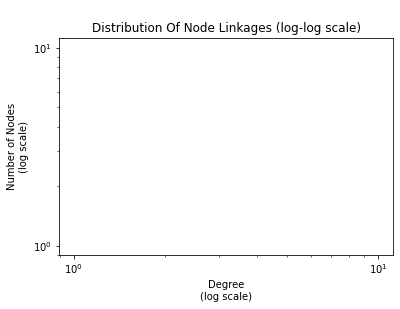

In [37]:
def plot_degree_histogram(g, normalized=True, weight=None):
    
    degree_sequence = sorted([d for n, d in g.degree(weight=weight)], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    aux_x, aux_y = zip(*degreeCount.items())

    n_nodes = g.number_of_nodes()
    aux_y = list(aux_y)
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x, aux_y, 'o')

In [ ]:
max(n_degrees)

In [ ]:
comp = nx.strongly_connected_components(G)
sccs = list(nx.strongly_connected_components(G))
sccs.reverse()
len( sccs ) 
print(len( sccs ) / G.number_of_nodes())